In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from scripts.gestion_donnees.pretraitement import Pretraitement
from scripts.evaluation.evaluation_model import Evaluation
from scripts.classifieurs.forets_aleatoires import Forets_aleatoires
from scripts.classifieurs.reseaux_de_neurones import Reseaux_de_neurones
from scripts.classifieurs.Arbre_de_decision import Arbre_de_decision
from scripts.classifieurs.svm import SVM_Classificateur
from scripts.classifieurs.adaboost import AdaBoost_model
from scripts.classifieurs.bagging import Bagging_model
from sklearn.ensemble import RandomForestClassifier




c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Partie 1 :  Prétraitement et analyse des données

In [2]:
# creation des instances
Ev = Evaluation
Pt = Pretraitement("./data/train.csv")
#  charger donneés entrainement
df_train_init = Pt.Charger_donnees()
# encoder donneés
etiquette,classes = Pt.Encoder_donnees(df_train_init,"species")
df_train_init = df_train_init.drop(['id','species'], axis=1)
# supprimer les valeurs aberrantes
outliers = Pt.Indice_outliers(df_train_init,3.0)
df_train = df_train_init.drop(outliers)
etiquette = [etiquette[i] for i in range(len(etiquette)) if i not in outliers]
# diviser les donnees
x_train, x_test, y_train, y_test, x_val, y_val = Pt.Diviser_donnees(df_train,etiquette)


In [ ]:
#vérifie la redondance des datas
print("Le nombre de données redondantes de train est " + str(df_train.duplicated().sum()))
#vérifie si pour un des attributs il manque une valeur
print("Nb valeur manquante train " + str(df_train.isnull().any().sum()))
#
unique_elements = set(etiquette)

# Get the count of unique elements
n_classes = len(unique_elements)
print(n_classes)


## Partie 2 : Modélisation et évaluation des données

##### Forets aléatoires

In [ ]:
model_foret_alea = Forets_aleatoires(x_train, y_train, x_val, y_val,x_test,y_test)
model_foret_alea.garder_meilleur_hyperparameters()
model_foret_alea.entrainement()
predictions = model_foret_alea.prediction()

In [ ]:
evaluation = Evaluation(model_foret_alea.rf_classifier, model_foret_alea.x_test, model_foret_alea.y_test,model_foret_alea.learning_curve_data)
f1, precision, recall = evaluation.calculate_metrics(model_foret_alea.y_test, model_foret_alea.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation.plot_roc_curve()
evaluation.plot_learning_curves()
evaluation.plot_confusion_matrix()
evaluation.generate_classification_report()

##### SVM

In [ ]:
svm_model = SVM_Classificateur(x_train, y_train, x_val, y_val,x_test,y_test)
svm_model.garder_meilleur_hyperparameters()
svm_model.entrainement()
predictions = svm_model.prediction()

In [ ]:
evaluation_svm = Evaluation(model=svm_model.svm_classifier, x_test=x_test, y_test=y_test, learning_curve_data=svm_model.learning_curve_data)
evaluation_svm.plot_learning_curves()
evaluation_svm.plot_roc_curve()
evaluation_svm.plot_confusion_matrix()
evaluation_svm.generate_classification_report()


##### Decesion tree

In [ ]:
Arbre_de_decision_model = Arbre_de_decision(x_train, y_train, x_val, y_val, x_test, y_test)
Arbre_de_decision_model.garder_meilleur_hyperparameters()
Arbre_de_decision_model.entrainement()
predictions = Arbre_de_decision_model.prediction()


In [ ]:
evaluation_dt = Evaluation(Arbre_de_decision_model.dt_classifier, Arbre_de_decision_model.x_test, Arbre_de_decision_model.y_test,Arbre_de_decision_model.learning_curve_data)
f1, precision, recall = evaluation_dt.calculate_metrics(Arbre_de_decision_model.y_test, Arbre_de_decision_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_dt.plot_roc_curve()
evaluation_dt.plot_learning_curves()
evaluation_dt.plot_confusion_matrix()
evaluation_dt.generate_classification_report()

##### Ada boosting


In [ ]:
adaboost_model = AdaBoost_model(x_train, y_train, x_val, y_val, x_test, y_test)
adaboost_model.garder_meilleur_hyperparameters()
adaboost_model.entrainement()
predictions = adaboost_model.prediction()

In [ ]:
evaluation_ab = Evaluation(adaboost_model.ab_classifier, adaboost_model.x_test, adaboost_model.y_test,adaboost_model.learning_curve_data)
f1, precision, recall = evaluation_ab.calculate_metrics(adaboost_model.y_test, adaboost_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plot_roc_curve()
evaluation_ab.plot_learning_curves()
evaluation_ab.plot_confusion_matrix()
evaluation_ab.generate_classification_report()


##### Reseaux de neurones


In [3]:
model_R_N = Reseaux_de_neurones(x_train, y_train, x_val, y_val, x_test, y_test)
model_R_N.preprocess_data()
model_R_N.garder_meilleur_hyperparameters()
model_R_N.entrainement()
model_R_N.prediction()

c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}


c:\Users\mazen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([17, 22, 66, 14, 59, 43, 95, 15, 25, 47, 47, 21, 40, 15, 92, 93, 59,
       95, 59, 29, 51, 94,  4,  9, 61, 14, 19, 17, 21, 47, 37, 40, 58, 25,
       75, 42, 22,  3, 21, 96, 86, 36,  5, 35, 31, 12,  2, 48, 51, 49, 35,
        2, 85, 52, 26,  8, 81,  5, 56, 87, 16, 83, 54, 83, 34, 78, 43,  8,
       59, 53, 16, 89, 97, 39, 11, 63,  0, 66, 82, 92,  0, 65, 78, 31, 84,
       25, 94, 18, 70, 39, 13, 67, 17, 93, 55, 24,  4, 70, 91, 65, 25, 84,
       27, 37, 34, 97, 32, 30, 24, 32, 31, 96, 19, 42, 58, 25, 50, 84, 29,
       30, 49, 51,  7, 19, 83, 36, 26, 21, 80, 52, 89, 85, 53, 48, 20, 70,
       14, 97, 33, 48,  6, 38, 95, 70, 80, 33, 71,  0, 37, 71, 30, 85, 91,
       55, 45, 81, 42, 31, 54,  6,  0, 93, 96, 60, 73, 86, 26, 62, 22,  9,
       12, 71, 37, 32,  5, 57,  9, 65, 66, 83, 45, 10, 92, 22, 13, 77, 87,
        6, 18, 79, 44, 97, 45])

F1 Score: 0.9840, Precision: 0.9896, Recall: 0.9845


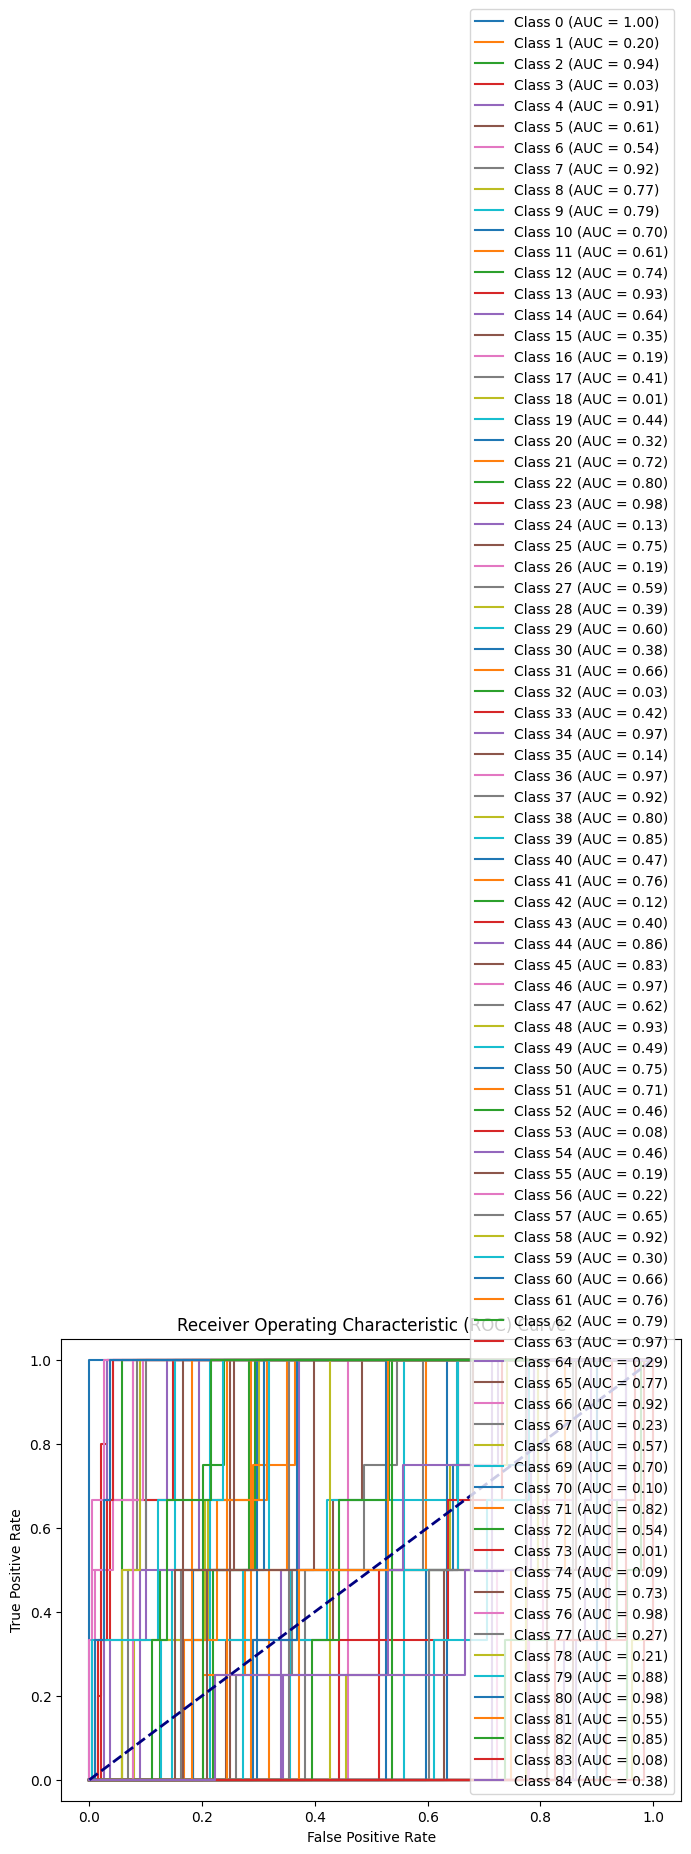

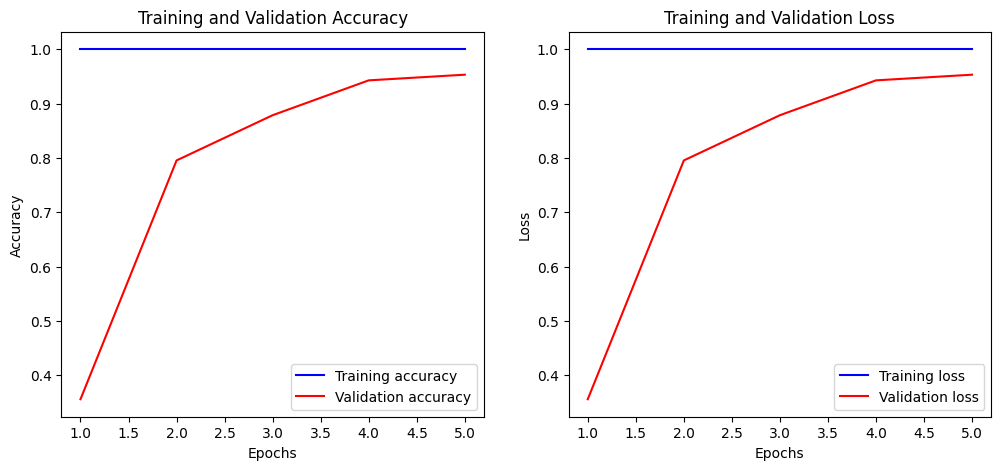

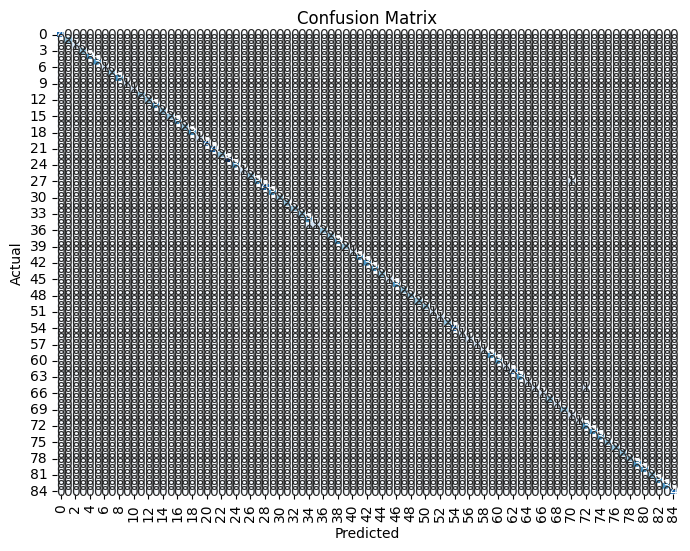

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
   

In [4]:
evaluation_ab = Evaluation(model_R_N.nn_classifier, model_R_N.x_test, model_R_N.y_test,model_R_N.learning_curve_data)
f1, precision, recall = evaluation_ab.calculate_metrics(model_R_N.y_test, model_R_N.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plot_roc_curve()
evaluation_ab.plot_learning_curves()
evaluation_ab.plot_confusion_matrix()
evaluation_ab.generate_classification_report()

In [ ]:
print("Best hyperparameters:", model_R_N.best_hyperparameters)

##### Bagging

In [ ]:
bagging_classifier = Bagging_model(x_train, y_train, x_val, y_val, x_test, y_test)
bagging_classifier.garder_meilleur_hyperparameters()
bagging_classifier.entrainement()


In [ ]:
evaluation_ab = Evaluation(bagging_classifier.classif, bagging_classifier.x_test, bagging_classifier.y_test,bagging_classifier.learning_curve_data)
f1, precision, recall = evaluation_ab.calculate_metrics(adaboost_model.y_test, adaboost_model.prediction())
print(f"F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
evaluation_ab.plot_roc_curve()
evaluation_ab.plot_learning_curves()
evaluation_ab.plot_confusion_matrix()
evaluation_ab.generate_classification_report()
